## ROSSMANN STORE SALES (Capstone Project):
Rossmann is a European drug distributor which operates over 3,000 drug stores across seven European countries. Since a lot of drugs come with a short shelf life, that is, they do not have a long expiry date, it becomes imperative for Rossmann to accurately forecast sales at their individual stores. Currently, the forecasting is taken care of by the store managers who are tasked with forecasting daily sales for the next six weeks. 

As expected, store sales are influenced by many factors, including promotional campaigns, competition, state holidays, seasonality, and locality.

With thousands of individual managers predicting sales based on their unique circumstances and intuitions, the accuracy of the forecasts is quite varied. 

The task is to build a forecasting model to forecast the daily sales for the next six weeks. For the task, the historical sales data for 1,115 Rossmann store is provided.



**Notebook by Sunanda Mahanta**

## Importing Libraries for Data Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Loading The Data

In [2]:
#The store table contains the metadata for every single store:
store = pd.read_csv("store.csv")
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


- Store - an Id that represents the store

- StoreType - differentiates between 4 different store models: a, b, c, d

- Assortment - describes an assortment level: a = basic, b = extra, c = extended

- CompetitionDistance - describes thedistance in meters to the nearest competitor store

- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb, May, Aug, Nov" means each round starts in February, May, August, November of any given year for that store

In [3]:
#The train table contains the sales data for individual stores at a daily level along with the details about the day
train = pd.read_csv("train.csv",parse_dates = True, low_memory = False, index_col = 'Date')
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


- Date - Describes the date on the day

- Store - a unique Id for each store

- DayOfWeek - Describes the day of the week (1 - Monday till 7 - Sunday)

- Date - Describes the date on the day

- Sales - the turnover for any given day (this is what you are forecasting)

- Customers - the number of customers on a given day

- Open - an indicator for whether the store was open: 0 = closed, 1 = open

- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

### Analysis of store data

In [4]:
#Number of (rows,columns) in data
store.shape

(1115, 10)

In [5]:
#Summary of data
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [6]:
#Info about store data
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**We can see there are some missing values exist in certain columns. Let's fill them with desried values and remove unnecessary data.**

In [7]:
#Percentage of null values in the data
round((100*((store.isnull().sum())/store.shape[0])),2)

Store                         0.00
StoreType                     0.00
Assortment                    0.00
CompetitionDistance           0.27
CompetitionOpenSinceMonth    31.75
CompetitionOpenSinceYear     31.75
Promo2                        0.00
Promo2SinceWeek              48.79
Promo2SinceYear              48.79
PromoInterval                48.79
dtype: float64

In [8]:
#missing values in CompetitionDistance
store[pd.isnull(store.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


**The corresponding information is simply missing from the data. In this case, it makes a complete sense to replace NaN with the median values.**

In [9]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [10]:
#Dropping columns with 48.79% missing valus
col_drop = ['Promo2SinceWeek','Promo2SinceYear','PromoInterval']
store = store.drop(col_drop,axis=1)

There is no information about other columns, so replace them with 0.

In [11]:
store.fillna(0, inplace=True)

In [12]:
store.shape

(1115, 7)

**Check for null values again**

In [13]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

## Analysis of train data

In [14]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


#### Extract dates for further analysis

In [15]:
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear

In [16]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
 8   Year           1017209 non-null  int64 
 9   Month          1017209 non-null  int64 
 10  Day            1017209 non-null  int64 
 11  WeekOfYear     1017209 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 100.9+ MB


**No missing values found.**

In [18]:
##Deriving sales per customer
train['SalePerCustomer'] = train['Sales']/train['Customers']

In [19]:
#Summary of train data
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,844340.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,2.361551e+01,9.493619
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.443338e+01,2.197494
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.100000e+01,7.895563
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.200000e+01,9.250000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,3.500000e+01,10.899729
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,5.200000e+01,64.957854


- Maximum sale per day reaches upto about 4155 dollars while sometimes it happen to be 0 sales (minimum). It may happen on the day when the store is closed.
- Maximum customers visit the store is about 7388. On an average 609 customers visit the store.
- On average customers spend about 9.50 dollars per day. Though there are days with Sales equal to zero.

In [20]:
train.isnull().sum()

Store                   0
DayOfWeek               0
Sales                   0
Customers               0
Open                    0
Promo                   0
StateHoliday            0
SchoolHoliday           0
Year                    0
Month                   0
Day                     0
WeekOfYear              0
SalePerCustomer    172869
dtype: int64

In [21]:
#Replacing missing value with 0
train.fillna(0,inplace=True)

In [22]:
train.isnull().sum()

Store              0
DayOfWeek          0
Sales              0
Customers          0
Open               0
Promo              0
StateHoliday       0
SchoolHoliday      0
Year               0
Month              0
Day                0
WeekOfYear         0
SalePerCustomer    0
dtype: int64

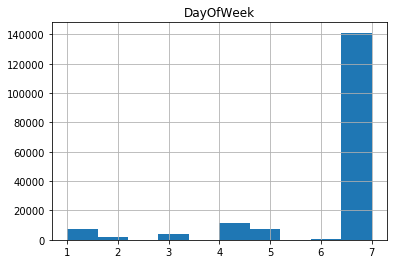

In [23]:
#Checking when the store is closed
store_closed = train[(train.Open == 0)]
store_closed.hist('DayOfWeek')
plt.show()

**Mostly the store is closed on sunday**

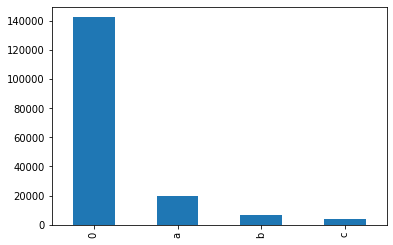

In [24]:
#Checking state holiday
store_closed['StateHoliday'].value_counts().plot(kind='bar')
plt.show()

**Normally all stores, with few exceptions, are closed on state holidays. All schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None**

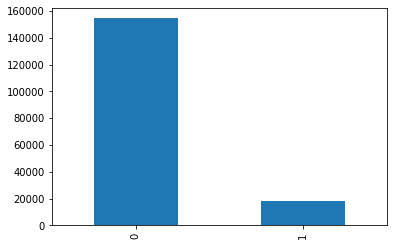

In [25]:
#Checking school holiday
store_closed['SchoolHoliday'].value_counts().plot(kind='bar')
plt.show()

**1 indicates very few the (Store, Date) was affected by the closure of public schools. Most of them remain unaffected(0).**

In [26]:
#Number of stores that are closed and sales is also 0
train[(train.Open == 0) & (train.Sales == 0)].shape

(172817, 13)

In [27]:
#Number of stores that are open but sales is 0
train[(train.Open != 0) & (train.Sales == 0)].shape

(54, 13)

In [28]:
#Let's drop the above data when sales is 0 
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]
train = train.drop(columns=train[(train.Open == 1) & (train.Sales == 0)].index)

In [29]:
train.shape

(844338, 13)

#### Joining train set with additional store information

In [30]:
df = store.merge(train,on=['Store'],how='inner')
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
0,1,c,a,1270.0,9.0,2008.0,0,5,5263,555,1,1,0,1,2015,7,31,31,9.482883
1,1,c,a,1270.0,9.0,2008.0,0,4,5020,546,1,1,0,1,2015,7,30,31,9.194139
2,1,c,a,1270.0,9.0,2008.0,0,3,4782,523,1,1,0,1,2015,7,29,31,9.143403
3,1,c,a,1270.0,9.0,2008.0,0,2,5011,560,1,1,0,1,2015,7,28,31,8.948214
4,1,c,a,1270.0,9.0,2008.0,0,1,6102,612,1,1,0,1,2015,7,27,31,9.970588


**Summary of each store type**

In [31]:
df.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


- Although there are highest number of type a stores, but on an average type b stores make highest number of sales.

**Total number of customers and sales of each store type**

In [32]:
df.groupby('StoreType')['Customers', 'Sales'].sum()

,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943


**Effect of Promotional events on Customers and Sales**

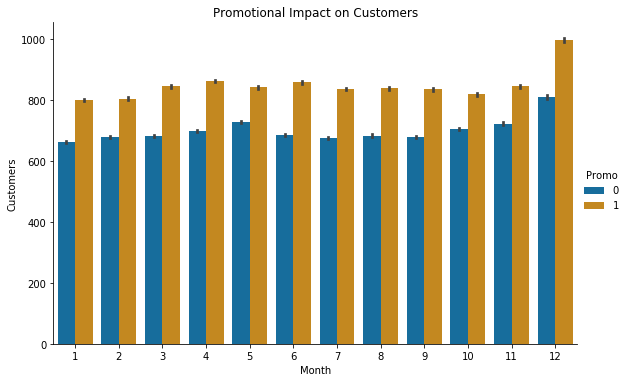

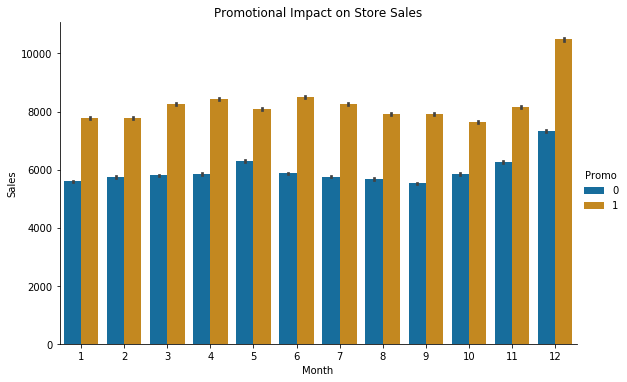

In [33]:
sns.catplot(data=df,x='Month',y='Customers',palette='colorblind',hue='Promo',kind='bar',height=5,
           aspect=8/5)
plt.title('Promotional Impact on Customers')

sns.catplot(data=df, x='Month',y='Sales',palette='colorblind',hue='Promo',kind='bar',height=5,
           aspect=8/5)

plt.title('Promotional Impact on Store Sales')
plt.show()

- It can be clearly seen that promotional events have impact on customers visit and number of sales, which increased every month.

**Impact of promotional events on customers**

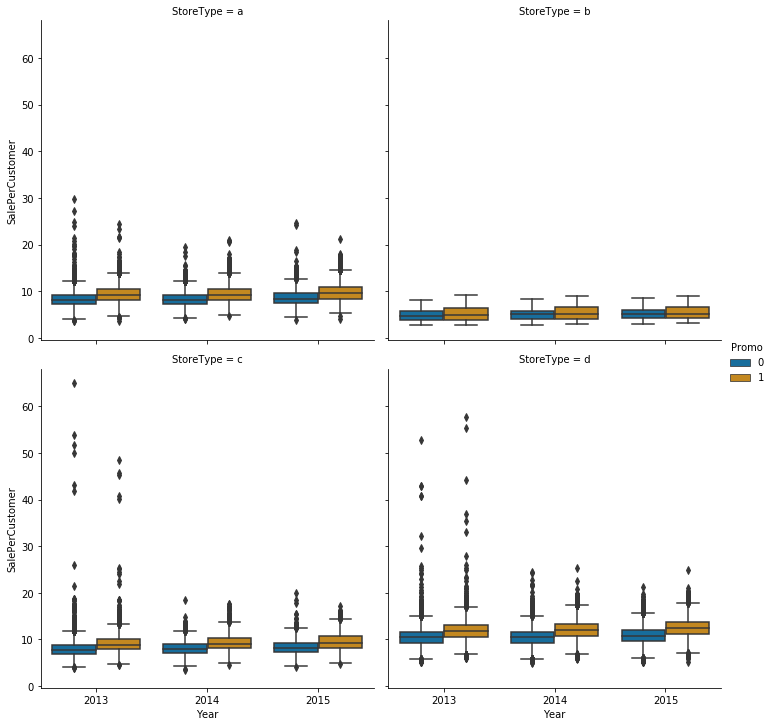

In [34]:
sns.catplot(data=df,x='Year',y='SalePerCustomer',col='StoreType',col_order=['a','b','c','d'],
            hue='Promo',palette='colorblind',col_wrap=2, kind='box')
plt.show()

- The customer behaviour of store type 'b' is least. It means that compared to other store types, store type b is least sensitive to promotional events.

**Impact of promotional events on store type**

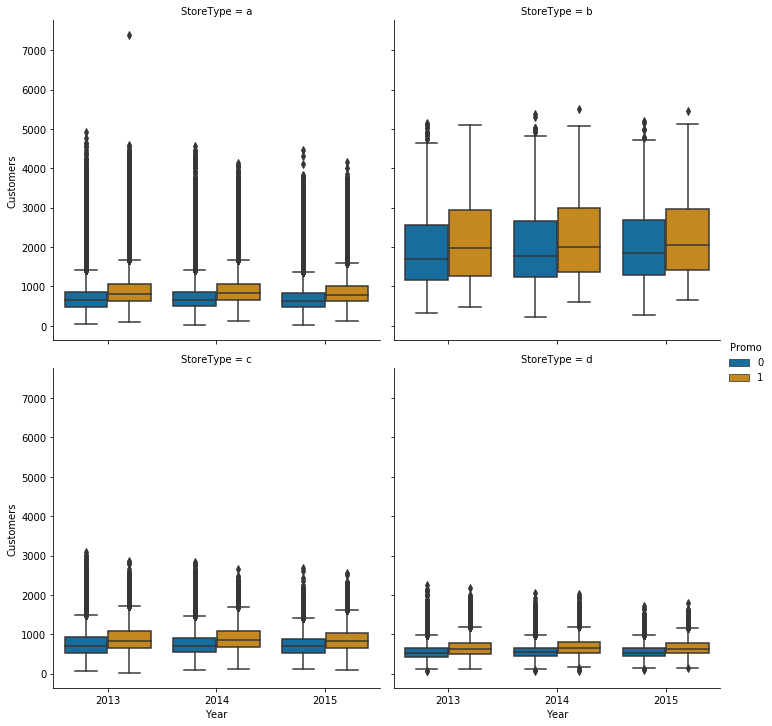

In [35]:
sns.catplot(data=df,x='Year',y='Customers',col='StoreType',col_order=['a','b','c','d'],
            hue='Promo',palette='colorblind',col_wrap=2,kind='box')
plt.show()

- Customer base at Store Type 'b' are more likely to visit the stores just for specific promotional items and leave without buying anything else if those items weren't available..

- Customers at Store Type 'a' exhibit similar tendency, ie target only specific promotional items. But overall, most will still increase the size of their purchase basket during a promotional event.

- Customers at Store Type 'c' and 'd' are more sensitive to promotional events.

In [36]:
df.groupby(['StoreType','Promo','Assortment']).SalePerCustomer.describe()

count       mean       std       min  \
StoreType Promo Assortment                                            
a         0     a           157775.0   8.245818  1.465991  3.635389   
                c            94757.0   8.545174  1.533253  4.151235   
          1     a           128253.0   9.355325  1.693864  3.680292   
                c            76257.0   9.606742  1.752278  4.132372   
b         0     a             3963.0   6.004593  0.736876  3.801695   
                b             5077.0   4.168919  0.674202  2.749075   
                c              582.0   5.568012  0.439001  4.289030   
          1     a             2446.0   6.733681  0.780860  4.143487   
                b             3132.0   4.155307  0.545394  2.752415   
                c              360.0   6.079790  0.374720  4.993193   
c         0     a            32268.0   7.739291  1.289794  3.382542   
                c            29967.0   8.489280  1.565809  4.095064   
          1     a            26286.0   8.894304  1.498498  4.448854   
                c            24447.0   9.676534  1.846214  4.686770   
d         0     a            51961.0  10.330576  1.593431  5.583333   
                c            91113.0  10.753989  1.801801  4.881279   
          1     a            41923.0  11.942236  1.838369  6.419786   
                c            73771.0  12.214557  2.020652  5.191489   

                                  25%        50%        75%        max  
StoreType Promo Assortment                                              
a         0     a            7.184426   8.062185   9.121190  29.877551  
                c            7.392801   8.388406   9.570332  24.143521  
          1     a            8.095819   9.141844  10.386454  24.352234  
                c            8.307203   9.445633  10.778080  18.067485  
b         0     a            5.458164   5.962480   6.556883   8.642473  
                b            3.681765   4.061713   4.555769   7.367793  
                c            5.298290   5.521871   5.806864   7.206720  
          1     a            6.152392   6.715897   7.288416   9.203528  
                b            3.776471   4.103035   4.494365   6.942342  
                c            5.812964   6.075476   6.299934   7.722051  
c         0     a            6.832583   7.588140   8.503000  19.916784  
                c            7.376110   8.354905   9.473299  64.957854  
          1     a            7.859049   8.738441   9.793758  21.919866  
                c            8.334942   9.514388  10.906227  48.381148  
d         0     a            9.297175  10.325250  11.389610  52.734737  
                c            9.448370  10.702128  11.930348  24.292722  
          1     a           10.759235  11.959459  13.152529  57.614983  
                c           10.783823  12.180952  13.572871  25.358779

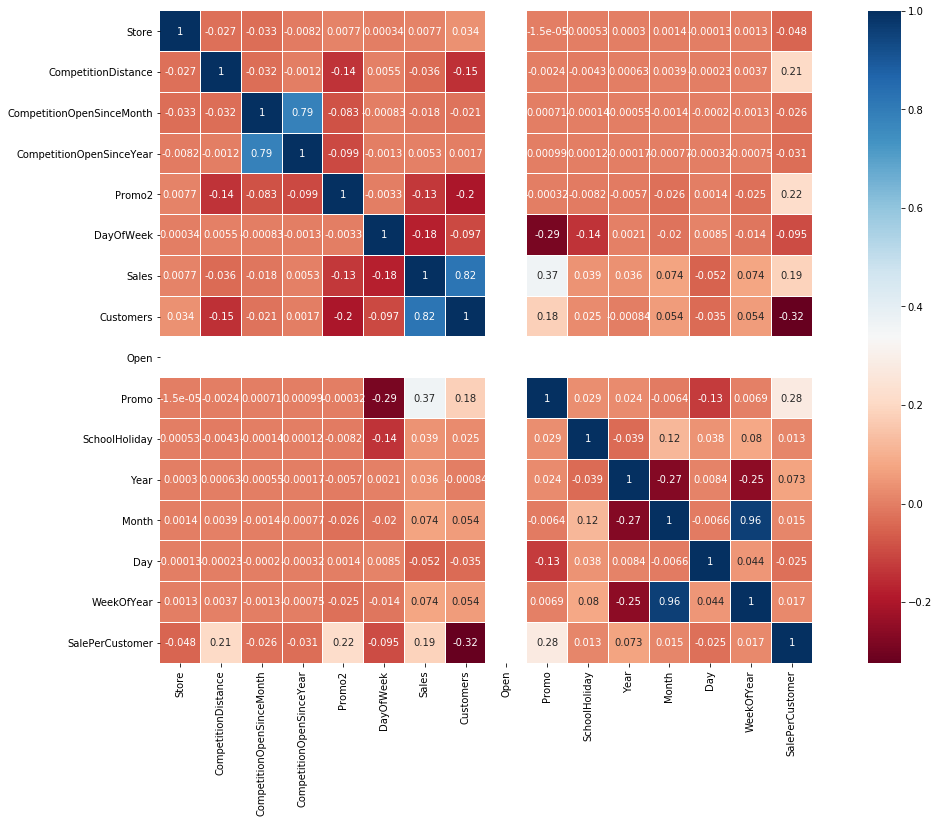

In [37]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)
plt.show()

In [38]:
df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
count,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000
mean,558.421374,5450.044852,4.926482,1369.692738,0.498670,3.520350,6955.959134,762.777166,1.0,0.446356,0.193578,2013.831945,5.845774,15.835706,23.646946,9.493641
std,321.730861,7801.082007,4.283634,935.556484,0.499999,1.723712,3103.815515,401.194153,0.0,0.497114,0.395102,0.777271,3.323959,8.683392,14.389931,2.197448
min,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,46.000000,8.000000,1.0,0.000000,0.000000,2013.000000,1.000000,1.000000,1.000000,2.749075
25%,280.000000,710.000000,0.000000,0.000000,0.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000,2013.000000,3.000000,8.000000,11.000000,7.895571
50%,558.000000,2325.000000,4.000000,2006.000000,0.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000,2014.000000,6.000000,16.000000,23.000000,9.250000
75%,837.000000,6880.000000,9.000000,2011.000000,1.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000,2014.000000,8.000000,23.000000,35.000000,10.899729
max,1115.000000,75860.000000,12.000000,2015.000000,1.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,2015.000000,12.000000,31.000000,52.000000,64.957854


### Outlier Detection & Treatment

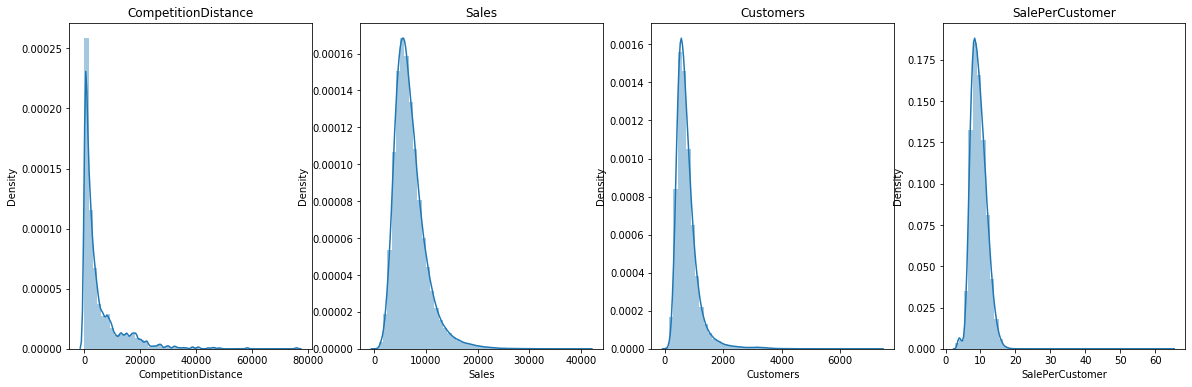

In [39]:
plt.figure(figsize=(20,6))
features = ['CompetitionDistance','Sales','Customers','SalePerCustomer']
for i in enumerate(features):
    plt.subplot(1,4,i[0]+1)
    sns.distplot(df[i[1]])
    plt.title(i[1])
plt.show()  

The distribution plots of variables Sales, CompetitionDistance, Customers, SalePerCustomer are found to be right skewed which means outliers are present.

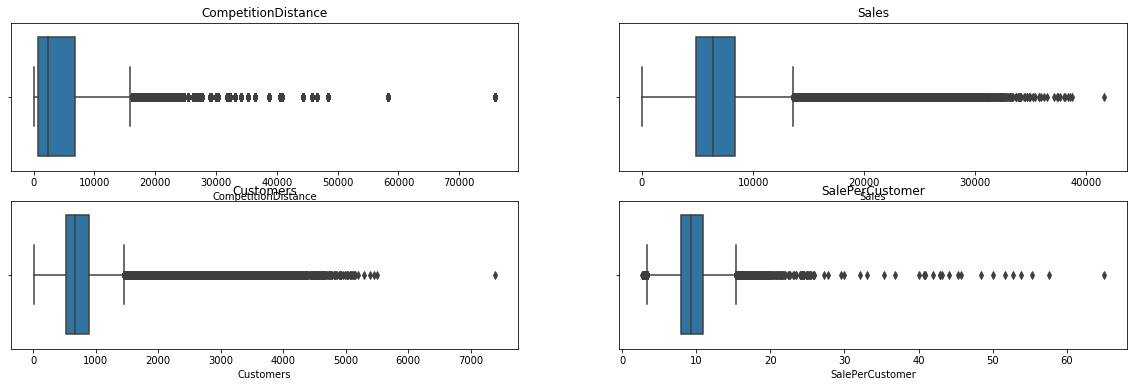

In [40]:
plt.figure(figsize=(20,6))
features = ['CompetitionDistance','Sales','Customers','SalePerCustomer']
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(df[i[1]])
    plt.title(i[1])
plt.show()  

**Remove outliers at 99 percentile**

In [41]:
#Competition Distance
percentiles = df['CompetitionDistance'].quantile([0.01,0.99]).values
df['CompetitionDistance'][df['CompetitionDistance'] <= percentiles[0]] = percentiles[0]
df['CompetitionDistance'][df['CompetitionDistance'] >= percentiles[1]] = percentiles[1]

#Sales
percentiles = df['Sales'].quantile([0.01,0.99]).values
df['Sales'][df['Sales'] <= percentiles[0]] = percentiles[0]
df['Sales'][df['Sales'] >= percentiles[1]] = percentiles[1]

#Customers
percentiles = df['Customers'].quantile([0.01,0.99]).values
df['Customers'][df['Customers'] <= percentiles[0]] = percentiles[0]
df['Customers'][df['Customers'] >= percentiles[1]] = percentiles[1]

#SalePerCustomer
percentiles = df['SalePerCustomer'].quantile([0.01,0.99]).values
df['SalePerCustomer'][df['SalePerCustomer'] <= percentiles[0]] = percentiles[0]
df['SalePerCustomer'][df['SalePerCustomer'] >= percentiles[1]] = percentiles[1]

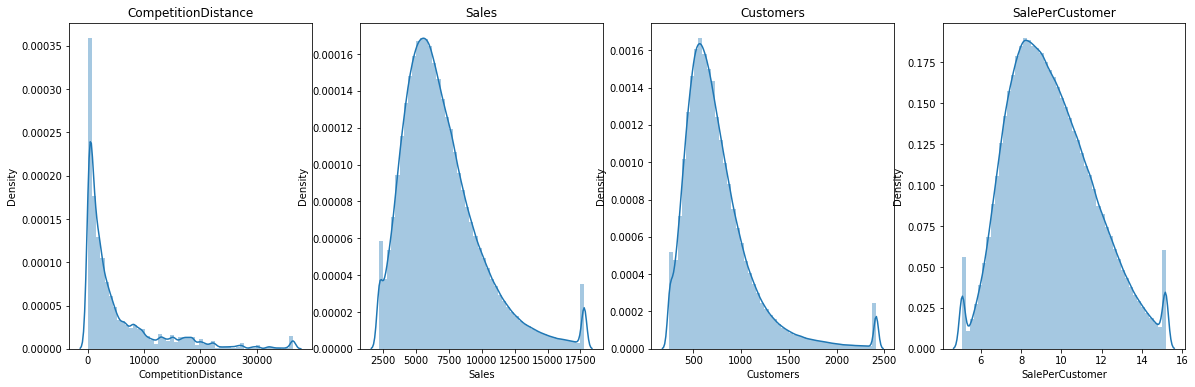

In [42]:
plt.figure(figsize=(20,6))
features = ['CompetitionDistance','Sales','Customers','SalePerCustomer']
for i in enumerate(features):
    plt.subplot(1,4,i[0]+1)
    sns.distplot(df[i[1]])
    plt.title(i[1])
plt.show()  

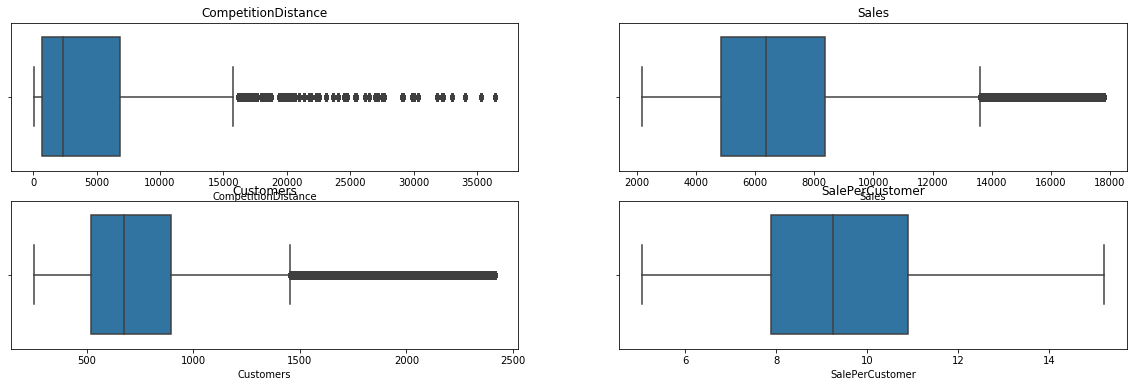

In [43]:
plt.figure(figsize=(20,6))
features = ['CompetitionDistance','Sales','Customers','SalePerCustomer']
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(df[i[1]])
    plt.title(i[1])
plt.show()  

**Standardize the sales and number of customers variables before modelling**

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_col = ['Sales','Customers','SalePerCustomer']
df[num_col] = scaler.fit_transform(df[num_col])
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
0,1,c,a,1270.0,9.0,2008.0,0,5,-0.563228,-0.553086,1,1,0,1,2015,7,31,31,-0.004690
1,1,c,a,1270.0,9.0,2008.0,0,4,-0.645334,-0.577746,1,1,0,1,2015,7,30,31,-0.139714
2,1,c,a,1270.0,9.0,2008.0,0,3,-0.725750,-0.640764,1,1,0,1,2015,7,29,31,-0.163439
3,1,c,a,1270.0,9.0,2008.0,0,2,-0.648375,-0.539386,1,1,0,1,2015,7,28,31,-0.254714
4,1,c,a,1270.0,9.0,2008.0,0,1,-0.279743,-0.396910,1,1,0,1,2015,7,27,31,0.223373


## Time Series Analysis

**Seasonality**
We take four stores from store types to represent their group:

- Store number 5 for StoreType A
- Store number 34 for StoreType B,
- Store number 15 for StoreType C
- Store number 67 for StoreType D.

It also makes sense to downsample the data from days to weeks using the resample method to see the present trends more clearly.

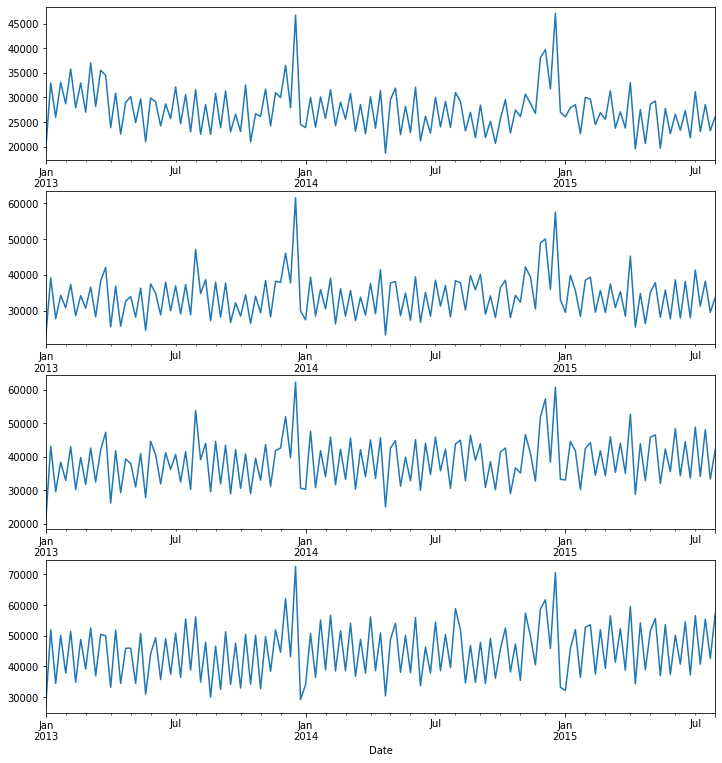

In [45]:
train['Sales'] = train['Sales'] * 1.0
# store types
sales_a = train[train.Store == 1]['Sales']
sales_b = train[train.Store == 31]['Sales']
sales_c = train[train.Store == 15]['Sales']
sales_d = train[train.Store == 67]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# store types
sales_a.resample('W').sum().plot(ax = ax1)
sales_b.resample('W').sum().plot(ax = ax2)
sales_c.resample('W').sum().plot(ax = ax3)
sales_d.resample('W').sum().plot(ax = ax4)
plt.show()

Retail sales for StoreType 'a' and 'b' tend to peak for the Christmas season and then decline after the holidays. Same trend can be seen for StoreType 'c' and 'd' (at the bottom).

### Stationarity Test
Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.

It can be checked usung ADF Test(p value should be less than 0.05)

In [46]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

In [47]:
test_stationarity(sales_a)

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -5.412786
p-value                          0.000003
#Lags Used                      13.000000
Number of Observations Used    767.000000
Critical Value (1%)             -3.438905
Critical Value (5%)             -2.865316
Critical Value (10%)            -2.568781
dtype: float64


**To make the model more stationary, specify the model in diffrences**

In [48]:
first_diff_a = sales_a - sales_a.shift(1)
first_diff_a = first_diff_a.dropna(inplace = False)
test_stationarity(first_diff_a, window = 12)

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.042084e+01
p-value                        1.706353e-18
#Lags Used                     2.000000e+01
Number of Observations Used    7.590000e+02
Critical Value (1%)           -3.438995e+00
Critical Value (5%)           -2.865355e+00
Critical Value (10%)          -2.568802e+00
dtype: float64


In [49]:
test_stationarity(sales_b)

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -5.853734e+00
p-value                        3.539785e-07
#Lags Used                     1.200000e+01
Number of Observations Used    7.710000e+02
Critical Value (1%)           -3.438860e+00
Critical Value (5%)           -2.865296e+00
Critical Value (10%)          -2.568770e+00
dtype: float64


In [50]:
first_diff_b = sales_b - sales_b.shift(1)
first_diff_b = first_diff_b.dropna(inplace = False)
test_stationarity(first_diff_b, window = 12)

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -9.694817e+00
p-value                        1.111602e-16
#Lags Used                     2.000000e+01
Number of Observations Used    7.620000e+02
Critical Value (1%)           -3.438961e+00
Critical Value (5%)           -2.865340e+00
Critical Value (10%)          -2.568794e+00
dtype: float64


In [51]:
test_stationarity(sales_c)

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.037261e+00
p-value                        1.372580e-07
#Lags Used                     1.600000e+01
Number of Observations Used    7.670000e+02
Critical Value (1%)           -3.438905e+00
Critical Value (5%)           -2.865316e+00
Critical Value (10%)          -2.568781e+00
dtype: float64


In [52]:
first_diff_c = sales_c - sales_c.shift(1)
first_diff_c = first_diff_c.dropna(inplace = False)
test_stationarity(first_diff_c, window = 12)

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.050165e+01
p-value                        1.080159e-18
#Lags Used                     2.000000e+01
Number of Observations Used    7.620000e+02
Critical Value (1%)           -3.438961e+00
Critical Value (5%)           -2.865340e+00
Critical Value (10%)          -2.568794e+00
dtype: float64


In [53]:
test_stationarity(sales_d)

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -4.875460
p-value                          0.000039
#Lags Used                      17.000000
Number of Observations Used    759.000000
Critical Value (1%)             -3.438995
Critical Value (5%)             -2.865355
Critical Value (10%)            -2.568802
dtype: float64


In [54]:
first_diff_d = sales_d - sales_d.shift(1)
first_diff_d = first_diff_d.dropna(inplace = False)
test_stationarity(first_diff_d, window = 12)

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.182530e+01
p-value                        8.230333e-22
#Lags Used                     1.600000e+01
Number of Observations Used    7.590000e+02
Critical Value (1%)           -3.438995e+00
Critical Value (5%)           -2.865355e+00
Critical Value (10%)          -2.568802e+00
dtype: float64


In [55]:
# Plotting seasonality and trend
from statsmodels.tsa.seasonal import seasonal_decompose
def plot_timeseries(Sales,StoreType):

    fig, axes = plt.subplots(2, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    decomposition= seasonal_decompose(Sales, model = 'additive',freq=365)

    estimated_trend = decomposition.trend
    estimated_seasonal = decomposition.seasonal
    estimated_residual = decomposition.resid
    
    axes[1].plot(estimated_seasonal, 'g', label='Seasonality')
    axes[1].legend(loc='upper left');
    
    axes[0].plot(estimated_trend, label='Trend')
    axes[0].legend(loc='upper left');

    plt.title('Decomposition Plots')

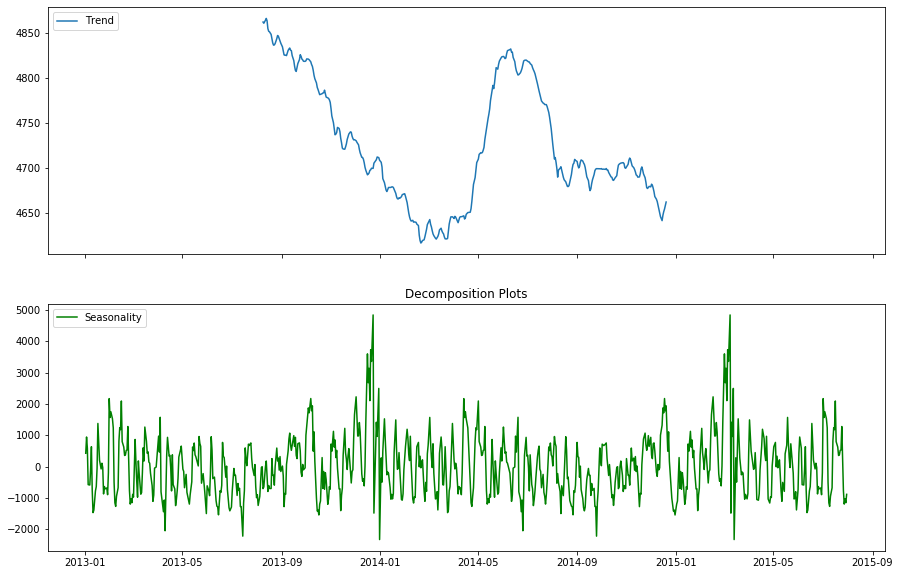

In [56]:
#Plotting seasonality and trend for store type a
plot_timeseries(sales_a,'a')

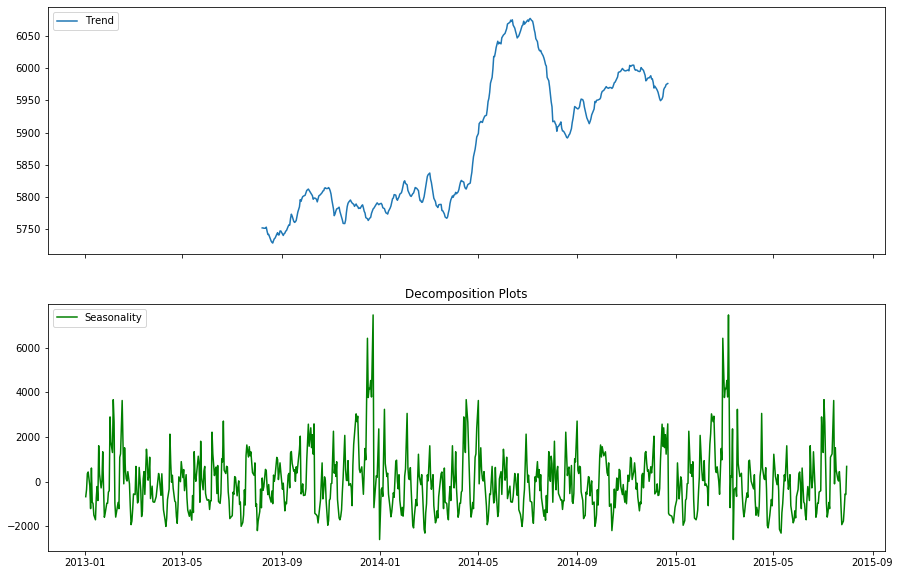

In [57]:
# Plotting seasonality and trend for store type b
plot_timeseries(sales_b,'b')

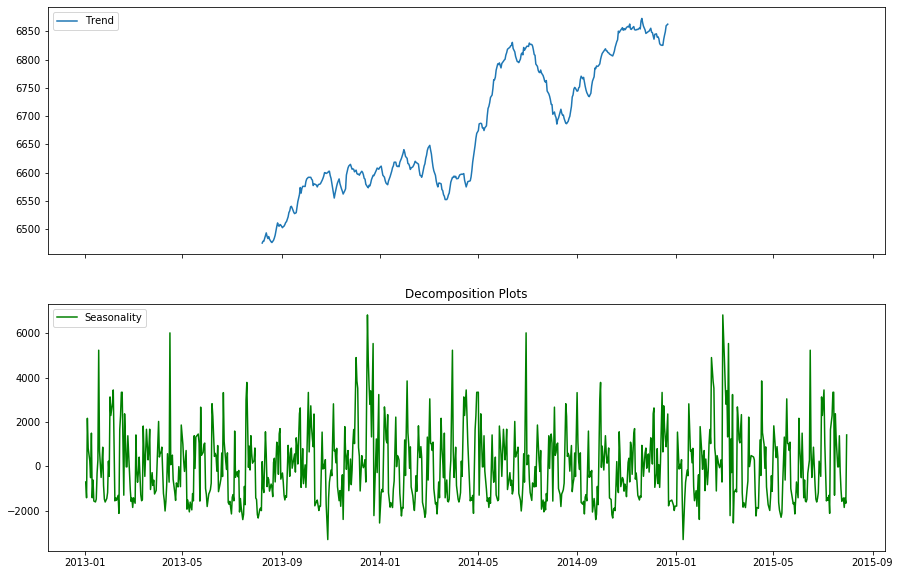

In [58]:
# Plotting seasonality and trend for store type c
plot_timeseries(sales_c,'c')

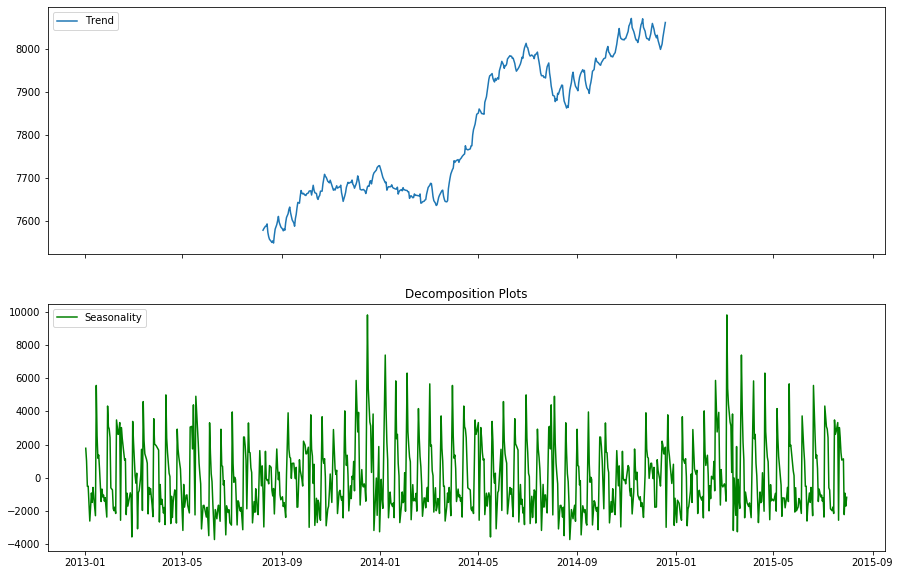

In [59]:
# Plotting seasonality and trend for store type d
plot_timeseries(sales_d,'d')

From the above plots, we can see that there is seasonality and trend present in our data. So, we'll use forecasting models that take both of these factors into consideration. For example, SARIMAX and Prophet.

### Forecasting a Time Series

Evaluation Metrics:

There are two popular metrics used in measuring the performance of regression (continuous variable) models i.e MAE & RMSE.

MAE - Mean Absolute Error: It is the average of the absolute difference between the predicted values and observed values.

RMSE - Root Mean Square Error: It is the square root of the average of squared differences between the predicted values and observed values.

MAE is easier to understand and interpret but RMSE works well in situations where large errors are undesirable. This is because the errors are squared before they are averaged, thus penalizing large errors. In our case, RMSE suits well because we want to predict the sales with minimum error (i.e penalize high errors) so that inventory can be managed properly.

So, let's choose RMSE as a metric to measure the performance of our models.

### Model - SARIMA (Seasonal Autoregressive Integrated Moving Average):

In order to use this model, we need to first find out values of p, d and q. p represents number of Autoregressive terms - lags of dependent variable. q represents number of Moving Average terms - lagged forecast errors in prediction equation. d represents number of non-seasonal differences.

To find the values of p, d and q - we use Autocorrelation function (ACF) and Partial Autocorrelation (PACF) plots.

ACF - measure of correlation between time series with a lagged version of itself. PACF - measure of correlation between time series with a lagged version of itself but after eliminating the variations already explained by the intervening comparison.

p value is the value on x-axis of PACF where the plot crosses the upper Confidence Interval for the first time. q value is the value on x-axis of ACF where the plot crosses the upper Confidence Interval for the first time.

Now, let's plot these graphs.

In [60]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import xgboost as xgb
#from fbprophet import Prophet

In [61]:
# Autocorrelation function to make ACF and PACF graphs
def auto_corr(sales):
    lag_acf = acf(sales,nlags=30)
    lag_pacf = pacf(sales,nlags=20,method='ols')
  
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color ='red')
    plt.axhline(y=1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.axhline(y=-1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.title('ACF')
    
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color ='red')
    plt.axhline(y=1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.axhline(y=-1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.title('PACF')

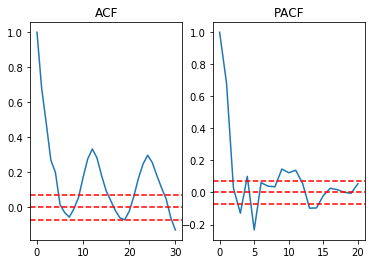

In [62]:
# ACF and PACF for store type a
auto_corr(sales_a)

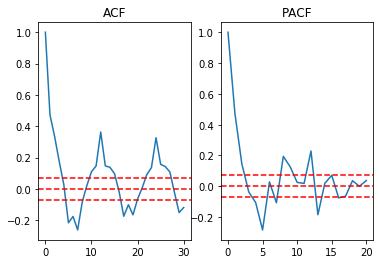

In [63]:
# ACF and PACF for store type c
auto_corr(sales_c)

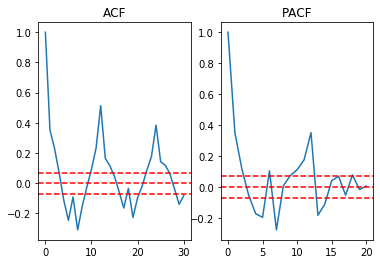

In [64]:
# ACF and PACF for store type d
auto_corr(sales_d)

The above graphs suggest that the p = 2 and q = 2 but let's do a grid search and see which combination of p, q and d gives the lowest Akaike information criterion (AIC, which tells us the quality of statistical models for a given set of data. Best model uses the lowest number of features to fit the data.

If we are to predict the sales of each store, we need to consider the whole data set rather than one store of each category. We took one store of each category to understand the tiem series data but from now on, we'll use the whole dataset for modelling.

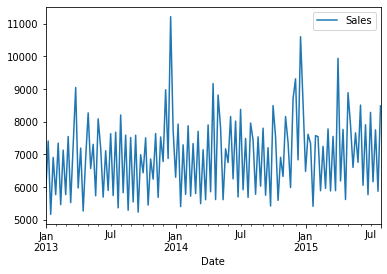

In [66]:
# Summing sales on per week basis
train_sarima = train.resample("W").mean() 
train_sarima = train_sarima[["Sales"]]
train_sarima.plot();

##### Hyperparamter tuning ARIMA model

As discussed above, we have three parameters (p, d and q) for SARIMA model. So, in order to choose the best combination of these parameter, we'll use a grid search. The best combination of parameters will give the lowest AIC score.

In [67]:
# Define the p, d and q parameters to take any value between 0 and 3
import itertools
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA: ')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA: 
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [69]:
# Determing p,d,q combinations with AIC scores.
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_sarima,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results = mod.fit()

        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2758.392331338811
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2442.283367326379
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2182.944628212259
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1929.2998505123362
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2203.729141097755
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2162.627134889668
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1954.417201534335
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1930.1997567695526
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2668.77012981082
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2344.271786335771
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2157.1126249683566
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1901.3950532072931
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2198.5334880411115
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2139.107606149573
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1942.813566811144
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1901.2873668667858
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2399.5285498160406
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2180.336265167649
ARIM

We can see from the above grid search that our optimal parameter combination is ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1847.508346811542. So, let's use this in our model.

Fitting the model - using hyperparamters tuned above

In [70]:
# Fitting the data to SARIMA model 
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train_sarima,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_sarima = model.fit()

print(results_sarima.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5576      0.090     -6.227      0.000      -0.733      -0.382
ma.L1         -0.7303      0.060    -12.230      0.000      -0.847      -0.613
ar.S.L12      -0.1578      0.133     -1.185      0.236      -0.419       0.103
ma.S.L12      -1.0328      0.663     -1.558      0.119      -2.332       0.267
sigma2        1.2e+06   8.76e+05      1.369      0.171   -5.18e+05    2.92e+06


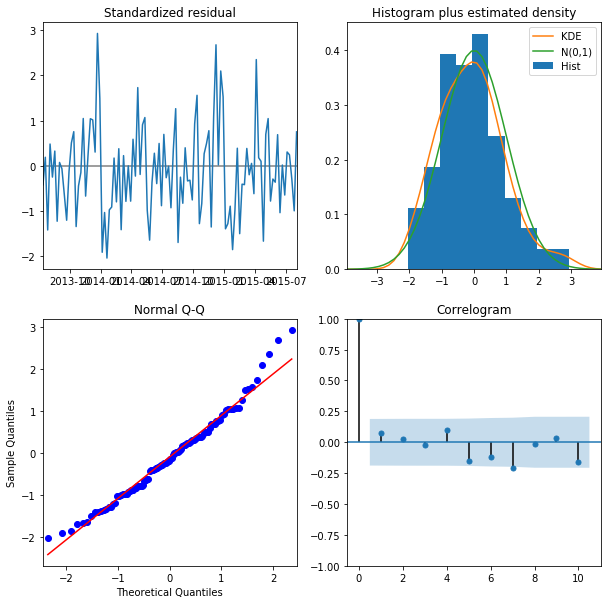

In [71]:
# Checking diagnostic plots
results_sarima.plot_diagnostics(figsize=(10, 10))
plt.show()

We can see from the above 'Histogram plus estimated density' plot that our KDE (Kernel Desnity Estimator) plot closely follows the N(0,1) normal distribution plot. The Normal Q-Q plot shows that the ordered distribution of residuals follows the distribution similar to normal distribution. Thus, our model seems to be pretty good.

Standardized residual plot tells us that there is no major seasonality trend, which is confirmed by Correlogram (autocorrelation) plot. Autocorrelation plot tells us that the time series residuals have low correlation with lagged versions of itself.

## Cointegration - Johansen Test

Two time-series can be considered as cointegrated if they move together. This means that they are bound over time, and thus stay in equillibrium.

In [72]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#Cointegration - Johansen Test
"""
    Johansen cointegration test of the cointegration rank of a VECM

    Parameters
    ----------
    endog : array_like (nobs_tot x neqs)
        Data to test
    det_order : int
        * -1 - no deterministic terms - model1
        * 0 - constant term - model3
        * 1 - linear trend
    k_ar_diff : int, nonnegative
        Number of lagged differences in the model.
"""

def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [73]:
joh_model = coint_johansen(df[['Sales','Promo2','Customers','SalePerCustomer']],-1,1) # k_ar_diff +1 = K
joh_output(joh_model)

   max_eig_stat     trace_stat
0  67185.031393  107949.649090
1  29633.760046   40764.617698
2  10840.738672   11130.857652
3    290.118980     290.118980 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[21.837  24.1592 29.0609]
 [15.7175 17.7961 22.2519]
 [ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[37.0339 40.1749 46.5716]
 [21.7781 24.2761 29.5147]
 [10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]] 



Note that the test-statistics at each stage for both trace test and max eigen test are greater than the test statistic at 5% significance level. 
SO THE RANK OF THE MATRIX IS 2 => NO COINTEGRATION => VAR IN DIFFERENCE IS SUFFICIENT FOR THESE 4 SERIES.

## Sales Prediction for the next 6 weeks.

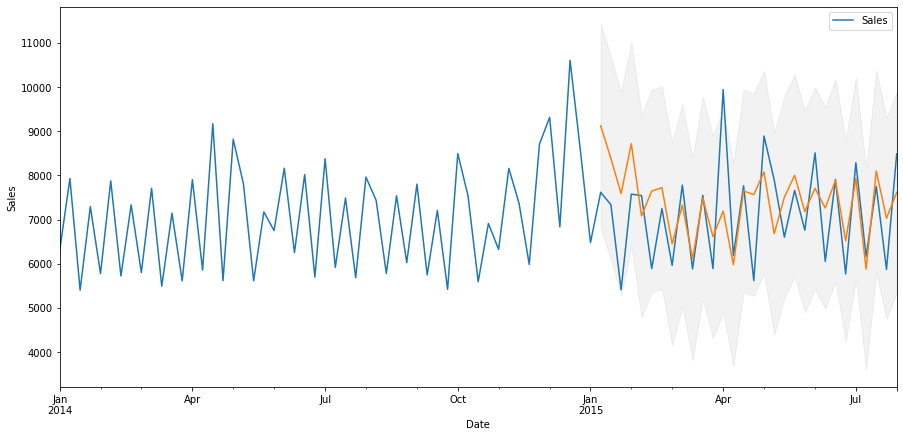

Root Mean Squared Error:  1060.156038942802


In [78]:
# Model Prediction and validation 
# Predictions are performed for the 11th Jan' 2015 onwards of the train data.
from math import sqrt
pred = results_sarima.get_prediction(start=pd.to_datetime('2015-01-11'), dynamic = False) 

# Get confidence intervals of forecasts
pred_ci = pred.conf_int() 

ax = train_sarima["2014":].plot(label = "observed", figsize=(15, 7))
pred.predicted_mean.plot(ax = ax, label = "One-step ahead Forecast", alpha = 1)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], 
                color = "k", alpha = 0.05)

ax.set_xlabel("Date")
ax.set_ylabel("Sales")

plt.legend
plt.show()

train_sarima_forecasted = pred.predicted_mean
train_sarima_truth = train_sarima["2015-01-11":]

# Calculating the error
rms_sarima = sqrt(mean_squared_error(train_sarima_truth, train_sarima_forecasted))
print("Root Mean Squared Error: ", rms_sarima)

**The sales for next 6 weeks of Rossman Store is predicted above using SARIMA model.**